**Limpeza e tratamento de Dados:**

In [ ]:
import pandas as pd 
import seaborn as srn
import statistics as sts

In [16]:
# Importar dados :
dataset = pd.read_csv("Churn.csv", sep=";")
# Visualizar 5 primeiras linhas
dataset.head()


,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [15]:
# Tamanho
dataset.shape

(999, 12)

In [20]:
dataset.columns = ["Id","Score","Estado","Gênero","Idade","Patrimonio","Saldo","Produtos",
                   "TemcartCredito","Ativo","Salário","Saiu"]
# Visualizar 5 primeiras linhas
dataset.head()

,Id,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemcartCredito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [22]:
#explorar dados categoricos
#estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

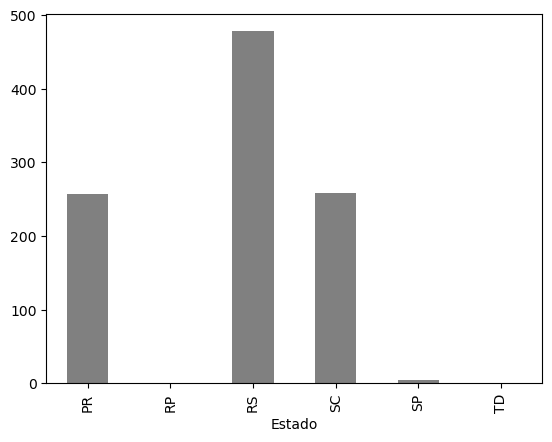

In [23]:
agrupado.plot.bar(color = 'gray')

In [26]:
#genero
agrupado = dataset.groupby(['Gênero']).size()
agrupado

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Gênero'>

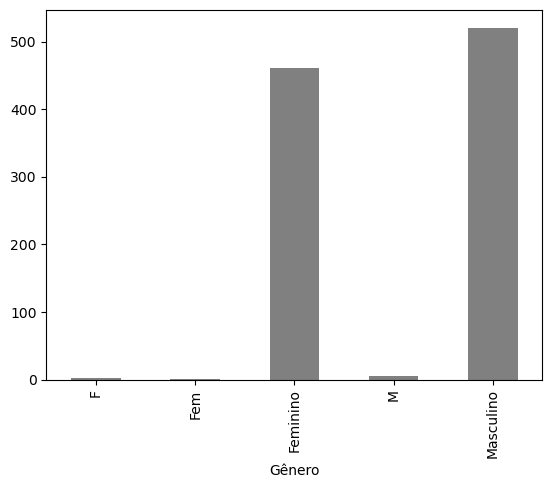

In [27]:
agrupado.plot.bar(color = 'gray')

In [28]:
#explorar colunas numéricas
#score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

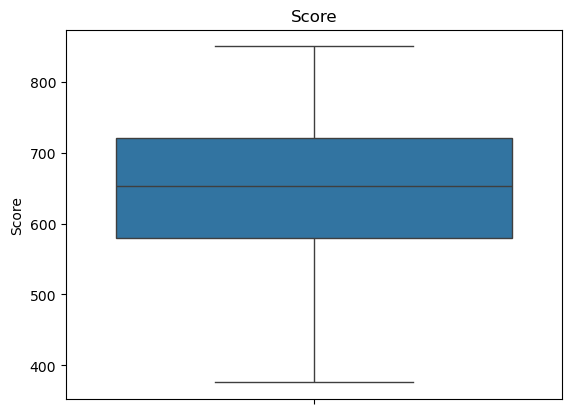

In [29]:
srn.boxplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

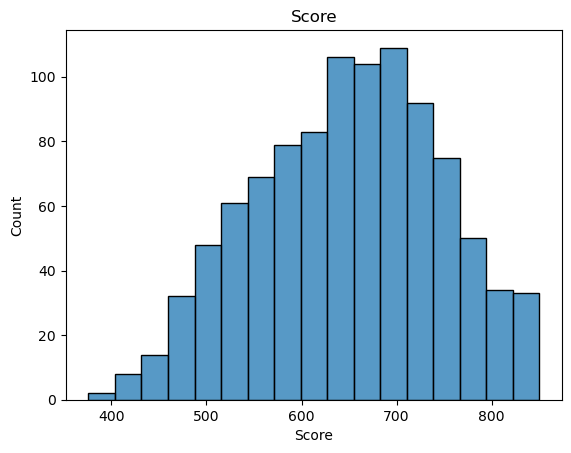

In [62]:
srn.histplot(dataset['Score']).set_title('Score')

In [31]:
#idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

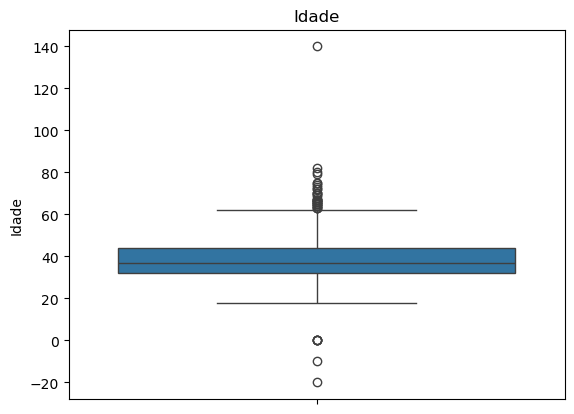

In [63]:
srn.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

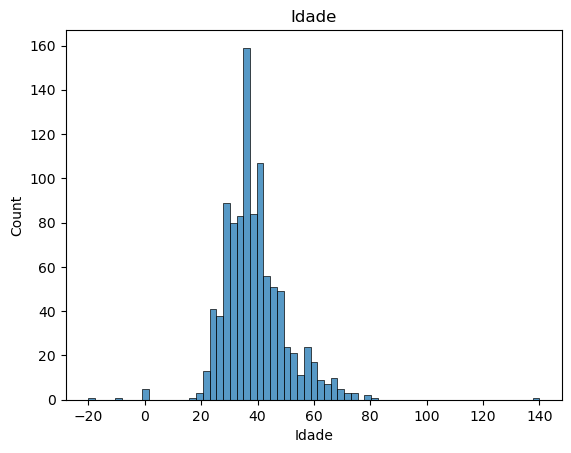

In [64]:
srn.histplot(dataset['Idade']).set_title('Idade')

In [58]:
#saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

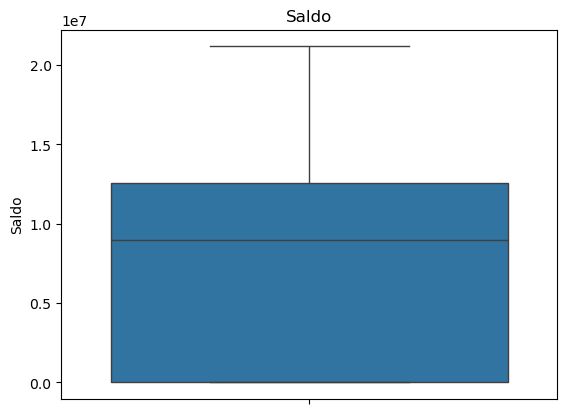

In [57]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

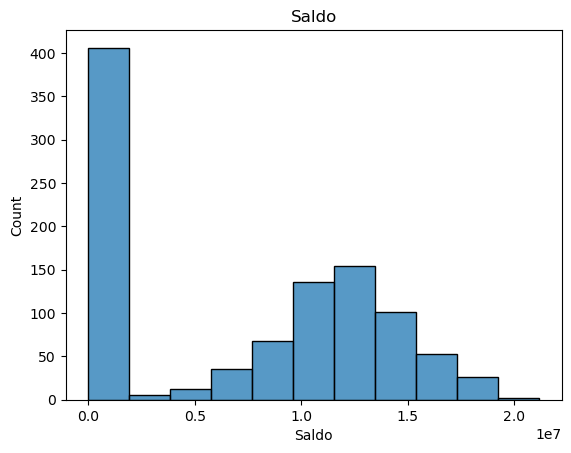

In [59]:
srn.histplot(dataset['Saldo']).set_title('Saldo')

In [55]:
#salário
dataset['Salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

Text(0.5, 1.0, 'Salário')

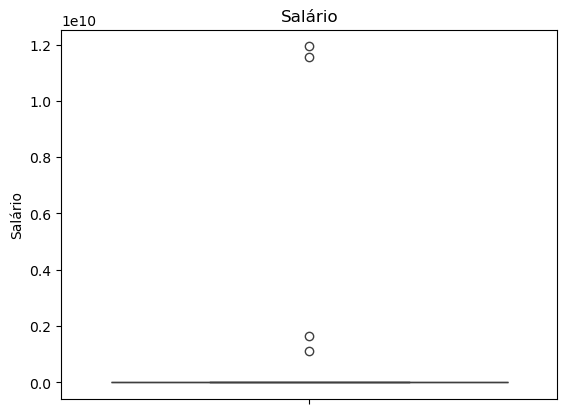

In [56]:
srn.boxplot(dataset['Salário']).set_title('Salário')

Text(0.5, 1.0, 'Salário')

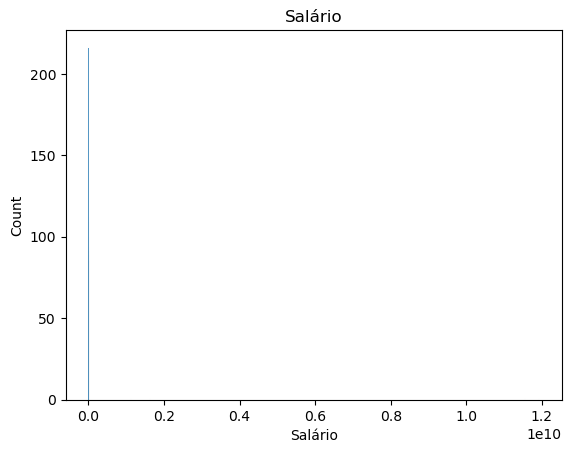

In [61]:
srn.histplot(dataset['Salário']).set_title('Salário')

In [44]:
#contamos valores NAN
#genero e salário
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Gênero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemcartCredito    0
Ativo             0
Salário           7
Saiu              0
dtype: int64

In [65]:
#salarios
#remover nas e substiutir pela mediana
dataset['Salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

In [ ]:
mediana = sts.median(dataset['Salário'])
mediana

In [ ]:
#substituir NAN por mediana
dataset['Salário'].fillna(mediana, inplace=True)

In [ ]:
#Verificamos se NAN não existem mais
dataset['Salário'].isnull().sum()

In [ ]:
#genero, falta de padronização e NAs
agrupado = dataset.groupby(['Gênero']).size()
agrupado

In [ ]:
#total de Nas
dataset['Gênero'].isnull().sum()

In [ ]:
#preenche NAs com Masculino (moda)
dataset['Gênero'].fillna('Masculino', inplace=True)

In [ ]:
#verificamos novamente NANs
dataset['Gênero'].isnull().sum()

In [ ]:
#padroniza de acordo com o dominio
dataset.loc[dataset['Gênero'] ==  'M', 'Gênero'] = "Masculino"
dataset.loc[dataset['Gênero'].isin( ['Fem','F']), 'Gênero'] = "Feminino"
#visualiza o resultado
agrupado = dataset.groupby(['Gênero']).size()
agrupado

In [ ]:
#idades fora do dominio
dataset['Idade'].describe()

In [ ]:
#visualizar 
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

In [ ]:
#calular a mediana
mediana = sts.median(dataset['Idade'])
mediana

In [ ]:
#substituir
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120), 'Idade'] = mediana

In [ ]:
#verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

In [ ]:
#dados duplicados, buscamos pelo ID
dataset[dataset.duplicated(['Id'],keep=False)]

In [ ]:
#excluimso pelo ID
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)
#buscamos duplicados 
dataset[dataset.duplicated(['Id'],keep=False)]

In [ ]:
#estado foram do domínio
agrupado = dataset.groupby(['Estado']).size()
agrupado

In [ ]:
#atribuomos RS (moda)
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()

In [ ]:
#verificamos o resultado
agrupado

In [ ]:
#outliers em salário, vamos considerar 2 desvios padrão
desv = sts.stdev(dataset['Salario'])
desv

In [ ]:
#definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ] 

In [ ]:
#vamos atualiar salarios para mediana, calculamos
mediana = sts.median(dataset['Salario'])
mediana

In [ ]:
#atribumos
dataset.loc[dataset['Salario'] >=  2 * desv, 'Salario'] = mediana
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ] 

In [46]:
dataset.head()

,Id,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemcartCredito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [50]:
dataset.shape

(999, 12)